#### Owner : Alexei Alves de Souza - Matrícula : 398611

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import unidecode #pip install Unidecode

#### Esse trabalho tem como objetivo trazer uma análise do "META"  do TCG Hearthstone, trazendo análises dos decks mais utilizados, porcentagens de vitórias para assim estabelecer um "META" de arquétipos de decks mais viavéis naquele momento.

### Montando os Datasets:
#### Os datasets foram obtidos a partir da página https://hsreplay.net/meta/?hl=pt-br#tab=matchups no formato do arquivo txt data.log, as funções abaixo irão tratar o arquivo para construir as respectivas tabelas.
#### Para extrair o arquivo basta copiar e colar e após isso selecionar a área que engloba os dados da partida.
#### Os seguintes procedimentos foram utilizados para remontar a tabela visível no site:

In [70]:
#Função para limpar os dados e obter os nomes dos arquetipos
def get_archetypes(patch):
    data = open(patch,'r',encoding = 'utf8')
    nome_linhas = []
    nome_colunas = []
    index = []
    
    control_flag = 0
    control_count = 0
    
    newMatchup = 0
    newArchetype = ''
    
    for line in data:
        if 'Contra:' in line :
            if control_flag == 0:
                oponent = line[7:].lstrip()
                nome_colunas.append(oponent.rstrip())
                index.append(1)
            else:
                if index[control_count] == 0:
                    oponent = line[7:].lstrip()
                    nome_colunas[control_count] = oponent.rstrip()
                    index[control_count] = 1
            
            
            
        if 'Número de partidas insuficiente' in line or 'Partida espelhada' in line:
            if control_flag == 0:
                nome_colunas.append('missing')
                index.append(0)
        
        
            
        if newMatchup == 1:
            control_count+= 1
            newMatchup = 0
            archetype = line
            
            if archetype != newArchetype and archetype != 'Número de partidas insuficiente\n' :
                if newArchetype != '' and control_flag == 0:
                    control_flag = 1
                
                control_count = 0
                newArchetype = archetype
                nome_linhas.append(newArchetype.rstrip())
                
             
            
        elif line[0] == '~' or line[0].isnumeric() == True:
            newMatchup = 1
    
    return nome_colunas,nome_linhas


In [71]:
#Função para obter os valores númericos
def get_values(patch,mode):
    
    if mode == 0:
        str_values = 'Taxa de vitória:'
        str_end = 16
    else :
        str_values = 'Partidas:'
        str_end = 9
    data = open(patch,'r',encoding = 'utf8')
    values = np.empty(0)
    for line in data :
        if 'Partida espelhada' in line :
            values = np.append(values,'mirror')
        elif str_values in line :
            num = line[str_end:].lstrip().rstrip()
            num = [x for x in num if x.isnumeric()]
            if mode == 0:
                num.insert(2,'.')
            num = ''.join(num)
            values = np.append(values,num)
        elif 'Número de partidas insuficiente' in line :
            values = np.append(values,'noMatches')
    return values,len(values)

In [72]:
# 0 -> taxa de vitoria, 1 -> Número de partidas
dataPatch = input('Digite o nome do arquivo: \n')
patch = './' + dataPatch
nome_colunas,nome_linhas = get_archetypes(patch)
lines,cols = len(nome_linhas),len(nome_colunas)
matriz1 = get_values(patch,1)[0].reshape((lines,cols))
matriz0 = get_values(patch,0)[0].reshape((lines,cols))

df1 = pd.DataFrame(matriz1,index = nome_linhas, columns= nome_colunas)
df0 = pd.DataFrame(matriz0,index = nome_linhas, columns= nome_colunas)

Digite o nome do arquivo: 
dataAfterExp.txt


In [73]:
#Convert o dataframe em float64 : NaN representa as Mirror Matches
df1 = df1.apply(pd.to_numeric,args = ('coerce',))
df0 = df0.apply(pd.to_numeric,args = ('coerce',))

In [74]:
#Dataset do número de partidas
df1.head(10)

,Libram Paladin,Pure Paladin,Paladino Murloc,Dragon Druid,Guardian Druid,Aggro Demon Hunter,Stealth Rogue,Big Warrior,Highlander Hunter,Totem Shaman,Mago Highlander,Gibberling Druid,Aggro Rogue,Caçador Dragão,Face Hunter,Sacerdote Highlander,Tempo Demon Hunter
Libram Paladin,NaN,3887.0,1860.0,373.0,17199.0,2815.0,545.0,5808.0,2270.0,3756.0,3555.0,4349.0,7098.0,3191.0,4839.0,2792.0,3152.0
Pure Paladin,3887.0,NaN,545.0,128.0,4471.0,728.0,140.0,1693.0,676.0,1040.0,969.0,1058.0,1892.0,939.0,1315.0,714.0,901.0
Paladino Murloc,1860.0,545.0,NaN,48.0,2376.0,382.0,73.0,828.0,343.0,589.0,485.0,596.0,980.0,481.0,663.0,387.0,495.0
Dragon Druid,373.0,128.0,48.0,NaN,468.0,61.0,NaN,205.0,67.0,128.0,106.0,104.0,171.0,103.0,145.0,77.0,105.0
Guardian Druid,17199.0,4471.0,2376.0,468.0,NaN,3674.0,643.0,6919.0,2745.0,4700.0,4105.0,5362.0,8480.0,3784.0,5655.0,2876.0,3750.0
Aggro Demon Hunter,2815.0,728.0,382.0,61.0,3674.0,NaN,108.0,1132.0,455.0,745.0,700.0,1037.0,1385.0,653.0,1064.0,565.0,675.0
Stealth Rogue,545.0,140.0,73.0,NaN,643.0,108.0,NaN,223.0,93.0,138.0,125.0,162.0,269.0,112.0,156.0,131.0,102.0
Big Warrior,5808.0,1693.0,828.0,205.0,6919.0,1132.0,223.0,NaN,927.0,1707.0,1394.0,1673.0,2841.0,1312.0,1861.0,893.0,1400.0
Highlander Hunter,2270.0,676.0,343.0,67.0,2745.0,455.0,93.0,927.0,NaN,622.0,565.0,756.0,1150.0,538.0,814.0,461.0,535.0
Totem Shaman,3756.0,1040.0,589.0,128.0,4700.0,745.0,138.0,1707.0,622.0,NaN,975.0,1121.0,1835.0,889.0,1372.0,733.0,875.0


In [75]:
#Dataset da winrate 
df0.head(10)

,Libram Paladin,Pure Paladin,Paladino Murloc,Dragon Druid,Guardian Druid,Aggro Demon Hunter,Stealth Rogue,Big Warrior,Highlander Hunter,Totem Shaman,Mago Highlander,Gibberling Druid,Aggro Rogue,Caçador Dragão,Face Hunter,Sacerdote Highlander,Tempo Demon Hunter
Libram Paladin,NaN,58.52,48.87,68.90,61.90,48.77,54.12,65.42,66.60,59.05,52.51,55.82,55.45,66.90,68.73,59.63,56.44
Pure Paladin,41.44,NaN,47.15,50.78,50.27,52.33,56.42,52.80,64.79,56.73,45.71,56.52,56.13,63.89,69.20,54.48,58.49
Paladino Murloc,51.12,52.84,NaN,56.25,52.23,43.97,57.53,46.73,56.85,65.02,41.03,46.81,54.48,64.03,56.41,63.30,48.28
Dragon Druid,31.09,49.21,43.75,NaN,48.71,49.18,NaN,40.97,56.71,55.46,57.54,49.03,62.57,58.25,64.82,53.24,64.76
Guardian Druid,38.07,49.69,47.76,51.28,NaN,50.95,55.67,47.04,54.93,46.34,52.37,50.24,57.53,55.89,62.01,46.83,59.28
Aggro Demon Hunter,51.22,47.66,56.02,50.81,49.04,NaN,53.70,44.52,60.00,64.69,46.57,64.03,52.49,55.74,48.59,47.61,52.14
Stealth Rogue,45.87,43.57,42.46,NaN,44.32,46.29,NaN,58.74,64.51,53.62,53.60,38.88,55.01,51.78,50.00,58.77,55.88
Big Warrior,34.57,47.19,53.26,59.02,52.94,55.47,41.25,NaN,45.09,52.60,53.80,56.24,46.70,44.66,45.56,37.51,57.28
Highlander Hunter,33.39,35.20,42.85,43.28,45.06,40.00,35.48,54.90,NaN,55.46,63.53,47.08,46.43,53.90,44.84,63.55,45.60
Totem Shaman,40.94,43.26,34.97,44.53,53.63,35.30,46.37,47.39,44.53,NaN,52.92,39.33,46.53,53.88,57.58,64.80,39.54


### Análise:
-> Aqui serão realizadas uma série de análises com o objetivo de filtrar os melhores decks! 

#### Arquétipos mais jogados:
##### Os 10 arquétipos com maior número de partidas contabilizadas.

In [76]:
#Soma os valores das partidas jogadas totais.
sum_df1 = df1.sum().sort_values(ascending=False)

#Seleciona os 10 arquétipos mais jogados
sum_df1_head = sum_df1.head(10)
sum_df1_head

Guardian Druid        91132.0
Libram Paladin        78900.0
Aggro Rogue           43322.0
Big Warrior           35689.0
Face Hunter           31240.0
Gibberling Druid      28396.0
Totem Shaman          24618.0
Pure Paladin          24519.0
Mago Highlander       22198.0
Tempo Demon Hunter    21307.0
dtype: float64

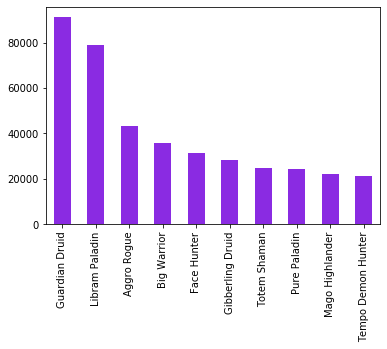

In [77]:
sum_df1_head.plot(kind = 'bar',color = 'blueviolet')

#### Classes mais jogadas

In [78]:
#Filtra os arquétipos pertecentes a cada classe agrupando utilizando tanto a linguagem inglesa como portuguesa.
classesEN = np.array(['Demon Hunter', 'Druid', 'Hunter', 'Mage', 'Paladin', 'Priest', 'Rogue', 'Shaman', 'Warlock', 'Warrior' ])
classesBR = np.array(['Caçador de Demônios', 'Druida', 'Caçador', 'Mago', 'Paladino', 'Sacerdote', 'Ladino', 'Xamã', 'Bruxo',
             'Guerreiro' ])
classesDici = dict.fromkeys(classesEN,0)
for key in sum_df1.keys() :
    
    if any(x in key for x in classesEN) or any(y in key for y in classesBR):
        classe = next((x for x in np.concatenate((classesEN,classesBR)) if x in key),False) 
        if classe in classesEN:
            pass
        else:
            classIdx = np.where(classesBR == classe)[0][0]
            classe = classesEN[classIdx]
        valueIdx = np.where(np.array(sum_df1.keys()) == key)[0][0]
        classesDici[classe] += sum_df1.values[valueIdx]


In [79]:
classesDici = {k: v for k, v in sorted(classesDici.items(), key=lambda item: item[1],reverse = True)}
classesDici

{'Druid': 122208.0,
 'Paladin': 116362.0,
 'Hunter': 67352.0,
 'Rogue': 46734.0,
 'Demon Hunter': 39970.0,
 'Warrior': 35689.0,
 'Shaman': 24618.0,
 'Mage': 22198.0,
 'Priest': 16730.0,
 'Warlock': 0}

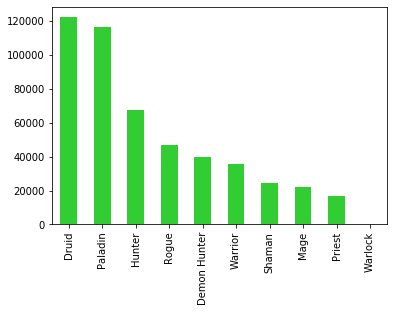

In [80]:
most_played_classes = pd.Series(classesDici)
most_played_classes.plot(kind = 'bar',color = 'limegreen')

#### Os 10 decks com maior winrate total:

In [81]:
#Obtém os decks com a maior winrate geral com os pesos sendo o número de partidas jogadas contra cada arquétipo
wr_total = ((df0*df1).transpose().sum()/df1.transpose().sum()).sort_values(ascending = False).head(10)
wr_total

Libram Paladin        59.889254
Paladino Murloc       52.641016
Pure Paladin          52.573557
Aggro Demon Hunter    51.741886
Guardian Druid        49.513658
Dragon Druid          49.490944
Stealth Rogue         49.333728
Gibberling Druid      48.678265
Mago Highlander       48.529935
Big Warrior           47.558860
dtype: float64

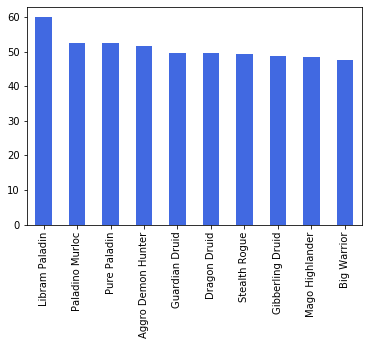

In [82]:
wr_total.plot(kind = 'bar',color = 'royalblue')

#### Os 10 decks com maior winrate em relação aos arquétipos mais jogados:

In [83]:
#Obtém os decks com maior winrate apenas contra os decks mais presentes do meta
most_played_arq = np.array(sum_df1_head.keys())
wrdf = df0[most_played_arq].transpose()[most_played_arq]

In [84]:
sum_arch = df1[wrdf.keys()].transpose()[wrdf.keys()]

wr_arch = ((wrdf*sum_arch).sum()/sum_arch.sum()).sort_values(ascending = False)
wr_arch

Libram Paladin        60.163268
Pure Paladin          51.562211
Guardian Druid        48.900651
Gibberling Druid      48.783131
Mago Highlander       48.511456
Big Warrior           47.576529
Totem Shaman          47.545165
Aggro Rogue           45.987552
Tempo Demon Hunter    45.527792
Face Hunter           42.194336
dtype: float64

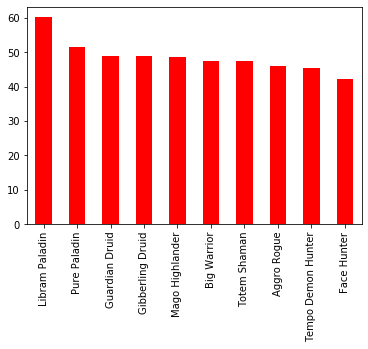

In [85]:
wr_arch.plot(kind = 'bar',color = 'r')

#### Os tops counters dos top 10 decks :

In [86]:
#A partir das análises anteorier adiciona os decks que aparecem em uma mas não em outra.
classes = np.unique(np.concatenate((np.array(wr_arch.keys()),np.array(wr_total.keys()))))

In [87]:
#Encontra os top counters de cada um dos arquétipos selecionados.
min_arch= df0.transpose()[classes]
counters = np.empty(0)
for i in classes:
    min_wr = np.nanmin(min_arch[i])
    idx = np.where(min_arch[i] == min_wr)
    counters = np.append(counters,df0.keys()[idx])

In [88]:
dici_counters = dict(zip(classes,counters))
dici_counters

{'Aggro Demon Hunter': 'Big Warrior',
 'Aggro Rogue': 'Dragon Druid',
 'Big Warrior': 'Libram Paladin',
 'Dragon Druid': 'Libram Paladin',
 'Face Hunter': 'Pure Paladin',
 'Gibberling Druid': 'Aggro Demon Hunter',
 'Guardian Druid': 'Libram Paladin',
 'Libram Paladin': 'Aggro Demon Hunter',
 'Mago Highlander': 'Highlander Hunter',
 'Paladino Murloc': 'Mago Highlander',
 'Pure Paladin': 'Libram Paladin',
 'Stealth Rogue': 'Gibberling Druid',
 'Tempo Demon Hunter': 'Dragon Druid',
 'Totem Shaman': 'Paladino Murloc'}

#### Winrates dos top counters

In [89]:
#Calcula a winrite dos counters dos principais decks
tc = df0[classes].transpose()[counters].transpose().drop_duplicates().transpose()
sum_tc = df1[classes].transpose()[counters].transpose().drop_duplicates().transpose()

In [90]:
wr_tc = ((tc*sum_tc).sum()/sum_tc.sum()).sort_values(ascending = False)
wr_tc

Libram Paladin        59.266646
Paladino Murloc       51.527426
Pure Paladin          51.494766
Aggro Demon Hunter    51.463815
Mago Highlander       48.951178
Dragon Druid          48.670896
Gibberling Druid      48.392135
Big Warrior           48.103057
Highlander Hunter     44.395304
dtype: float64

#### Previsão do Meta

#### Variáveis para inferência:
    -> winrate total
    -> winrate por arquétipos mais jogados
    -> max counter winrate

In [91]:
### Acrescentar as classes que aparecem no top counter mas não nas análises de maior winrate:
classes = np.unique(np.concatenate((classes,np.array(wr_tc.keys()))))

##### Winrate Total

In [92]:
#Calcula a winrate total para o as classes agora filtradas.
wr_total = ((df0*df1).transpose().sum()/df1.transpose().sum())
wr_total = wr_total[classes].sort_values(ascending = False)
wr_total

Libram Paladin        59.889254
Paladino Murloc       52.641016
Pure Paladin          52.573557
Aggro Demon Hunter    51.741886
Guardian Druid        49.513658
Dragon Druid          49.490944
Stealth Rogue         49.333728
Gibberling Druid      48.678265
Mago Highlander       48.529935
Big Warrior           47.558860
Totem Shaman          47.513433
Aggro Rogue           46.818693
Tempo Demon Hunter    46.462221
Highlander Hunter     45.466506
Face Hunter           43.935482
dtype: float64

##### Winrate por arquétipos mais jogados

In [93]:
#Calcula o winrate com relação aos decks mais jogados.
most_played_arq = np.array(sum_df1_head.keys())
wrdf = df0[most_played_arq].transpose()[classes]

sum_arch = df1[most_played_arq].transpose()[wrdf.keys()]

wr_arch = ((wrdf*sum_arch).sum()/sum_arch.sum()).sort_values(ascending = False)
wr_arch

Libram Paladin        60.163268
Paladino Murloc       51.763390
Pure Paladin          51.562211
Aggro Demon Hunter    51.324647
Guardian Druid        48.900651
Gibberling Druid      48.783131
Dragon Druid          48.777025
Mago Highlander       48.511456
Stealth Rogue         48.498322
Big Warrior           47.576529
Totem Shaman          47.545165
Aggro Rogue           45.987552
Tempo Demon Hunter    45.527792
Highlander Hunter     44.705769
Face Hunter           42.194336
dtype: float64

###### Max counter winrate

In [94]:
#Cria um dicionário com cada classe e seu respectivo counter à direita.
min_arch= df0.transpose()[classes]
counters = np.empty(0)
for i in classes:
    min_wr = np.nanmin(min_arch[i])
    idx = np.where(min_arch[i] == min_wr)
    counters = np.append(counters,df0.keys()[idx])

dici_counters = dict(zip(classes,counters))

In [95]:
#Calcula o winrate médio (total/vs decks mais jogados) de cada arquétipo
mean_wr = ((wr_total+wr_arch)/2).sort_values(ascending = False)

#Obtém os valores da maior winrate entre os decks counterados caso o arquétipo apareça na lista de counters, 
#caso não mantém a winrate média.
keys = list(dici_counters.keys())
max_counter_wr = dict(mean_wr)
for key in keys:
    if dici_counters[key] not in classes:
        continue
    counter = dici_counters[key]
    key_wr = mean_wr[key]
    if key_wr > max_counter_wr[counter]:
        max_counter_wr[counter] = key_wr
max_counter_wr

{'Libram Paladin': 60.02626114888206,
 'Paladino Murloc': 52.202202847870765,
 'Pure Paladin': 52.06788389539544,
 'Aggro Demon Hunter': 60.02626114888206,
 'Guardian Druid': 49.20715414238617,
 'Dragon Druid': 49.133984496355296,
 'Stealth Rogue': 48.91602524520244,
 'Gibberling Druid': 48.91602524520244,
 'Mago Highlander': 52.202202847870765,
 'Big Warrior': 51.53326642887994,
 'Totem Shaman': 47.52929902535627,
 'Aggro Rogue': 46.40312251922971,
 'Tempo Demon Hunter': 45.995006430816666,
 'Highlander Hunter': 48.52069559938782,
 'Face Hunter': 43.06490912114471}

##### Média dos valores de counter e da winrate média

In [96]:
#Tira a média aritimética dos valores de counter e a winrate média para definir o META
max_counter_wr = pd.Series(max_counter_wr)
META = ((max_counter_wr + mean_wr)/2).sort_values(ascending = False)

In [97]:
META

Libram Paladin        60.026261
Aggro Demon Hunter    55.779764
Paladino Murloc       52.202203
Pure Paladin          52.067884
Mago Highlander       50.361449
Big Warrior           49.550480
Guardian Druid        49.207154
Dragon Druid          49.133984
Stealth Rogue         48.916025
Gibberling Druid      48.823362
Totem Shaman          47.529299
Highlander Hunter     46.803417
Aggro Rogue           46.403123
Tempo Demon Hunter    45.995006
Face Hunter           43.064909
dtype: float64